<a href="https://colab.research.google.com/github/giovannicg/Estadisticas_python/blob/main/Tarea_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

La prueba de tolerancia a la glucosa, también conocida como
«examen de tolerancia oral a la glucosa», mide la respuesta del
cuerpo al azúcar (glucosa). Esta prueba se puede usar como prueba
de detección para la diabetes de tipo 2. En el departamento de
investigación de un hospital se está realizando un estudio para
conocer si la tolerancia a la glucosa en pacientes sanos tiende a
decrecer a medida que la edad de la persona aumenta, es decir
tarda más tiempo en desaparecer en nuestro organismo conforme
envejecemos. Para obtener las conclusiones del estudio se
suministra una dosis de glucosa, en forma de un preparado via oral,
a dos muestras de pacientes sanos escogidos al azar, jovenes( edad
menor de 30) y otros adultos ( edad superior a 30). Consideraremos
estas muestras independientes .

El test consistió en realizar la medición de glucosa en sangre en el
momento de la toma ( nivel basal ) de 100 gramos de glucosa y a los 60
minutos de la toma. Los resultados se muestran en el Excel. En la primera
columna se representa con 1 a los pacientes cuyo rango de edad es menor
que 30 ( jóvenes) y con 2 a los pacientes cuyo rango de edad es mayor
que 30, en la segunda columna la concentración en sangre en el momento
de la toma ( nivel basal, en mg/Dl) y en la tercera columna la
concentración de glucosa pasada una hora de la ingesta de la pastilla en
mg/Dl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## a) Obtener, usando algún programa estadístico, las medidas de centralización y dispersión para cada uno de los dos grupos de control para el nivel de glucosa basal, especificando para cada uno de los casos si la media es o no representativa.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('drive/MyDrive/ARCHIVODATOSEVALUACION24.xlsx')
df

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
0,1,90,136
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141
...,...,...,...
60,2,95,169
61,2,99,172
62,2,98,173
63,2,84,188


In [ ]:
#divido el dataset en df_1 para el grupo 1 y df_2 para el grupo 2

df_1 = df[df['Grupo de control'] == 1]

df_2 = df[df['Grupo de control'] == 2]

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
# Llamamos a la funcion para el dataset del grupo 1
print("Grupo de Control 1")
estadisticos_cont(df_1.select_dtypes('number'))


Grupo de Control 1


,count,mean,median,std,min,25%,50%,75%,max
Grupo de control,35.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
Nivel glucosa basal,35.0,85.028571,82.0,9.379219,65.0,78.5,82.0,90.5,104.0
Nivel glucosa 60 min,35.0,147.942857,148.0,9.548461,131.0,141.0,148.0,153.0,172.0


In [ ]:
# Llamamos a la funcion para el dataset del grupo 2
print("Grupo de Control 1")
estadisticos_cont(df_2.select_dtypes('number'))

Grupo de Control 1


,count,mean,median,std,min,25%,50%,75%,max
Grupo de control,30.0,2.000000,2.0,0.000000,2.0,2.00,2.0,2.00,2.0
Nivel glucosa basal,30.0,90.833333,90.5,8.461203,77.0,84.50,90.5,97.75,106.0
Nivel glucosa 60 min,30.0,173.266667,172.0,12.309047,152.0,161.75,172.0,181.75,198.0


In [ ]:
#Calculamos media y desviacion estandar para el data set del grupo 1
media_1 = df_1['Nivel glucosa basal'].mean()
desviacion_estandar_1 = df_1['Nivel glucosa basal'].std()

# Calculamos el coeficiente de variacion para el data set del grupo 1
coeficiente_variacion_1 = (desviacion_estandar_1 / media_1)
print('CV_1: ',coeficiente_variacion_1)

CV_1:  0.1103066743457002


In [ ]:
#Calculamos media y desviacion estandar para el data set del grupo 2
media_2 = df_2['Nivel glucosa basal'].mean()
desviacion_estandar_2= df_2['Nivel glucosa basal'].std()

# Calculamos el coeficiente de variacion para el data set del grupo 2
coeficiente_variacion_2 = (desviacion_estandar_2 / media_2)
print('CV_2: ',coeficiente_variacion_2)

CV_2:  0.09315085729461256


# Conclusión:
* Para el grupo 1 y 2 el CV del 0,11 y de 0,09 respectivamente indica que la dispersión de los datos en torno a la media es relativamente pequeña. Esto significa que los valores en el conjunto de datos están bastante concentrados alrededor de la media.


## b) Estudiar la simetría y la curtosis del nivel de glucosa basal en los adultos ( grupo de control 2)

In [ ]:
import scipy.stats as sc

simetria = sc.skew(df_2['Nivel glucosa basal'])
curtosis = sc.kurtosis(df_2['Nivel glucosa basal'])

print('simetria: ',simetria)
print('curtosis',curtosis)

simetria:  -0.07600786308740512
curtosis -1.0561848823209457


## Conclusión:
* El nivel de glucosa basal en el grupo 2 es aproximadamente simétrico, lo que sugiere que no hay una tendencia fuerte hacia niveles de glucosa muy altos o muy bajos en la mayoría de los individuos.
* La curtosis al ser menor que '0' esto sugiere que los datos tienen menos valores extremos.

## c) Indicar para cada una de las variables de estudio (nivel glucosa basal y nivel glucosa pasados 60 min) y en el grupo de control 1 el valor de los cuartiles y su significado y obtener el box- plot (diagrama de cajas) correspondiente. Estudiar la presencia de valores atípicos.

<ipython-input-11-3f5a0d644c94>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo', y='Niveles', data=df_plot, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

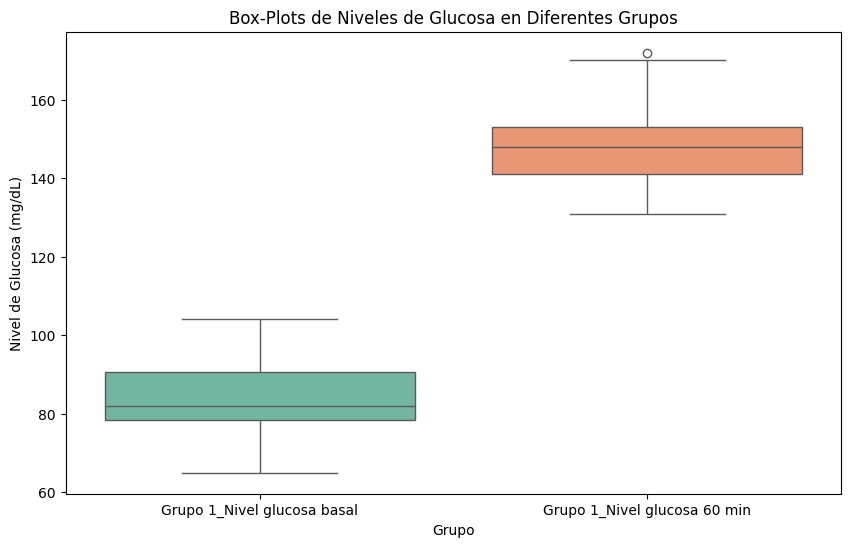

In [ ]:
import seaborn as sns

# Crear un nuevo DataFrame con datos reestructurados
data = {
    'Niveles': pd.concat([df_1['Nivel glucosa basal'], df_1['Nivel glucosa 60 min']]),

    'Grupo': ['Grupo 1_Nivel glucosa basal'] * len(df_1['Nivel glucosa basal']) +
             ['Grupo 1_Nivel glucosa 60 min'] * len(df_1['Nivel glucosa 60 min'])
}

# Convertir a DataFrame
df_plot = pd.DataFrame(data)

# Crear el gráfico de box-plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Niveles', data=df_plot, palette="Set2")

# Añadir título y etiquetas
plt.title("Box-Plots de Niveles de Glucosa en Diferentes Grupos")
plt.ylabel("Nivel de Glucosa (mg/dL)")

# Mostrar el gráfico
plt.show()

## Conclusión:
* En el Grupo 1_Nivel glucosa despues de 60 min se encuentra un valor atipico


## d) Estudiar la normalidad de los datos de cada uno de los grupos de control estudiados para el nivel de glucosa pasados 60 minutos.

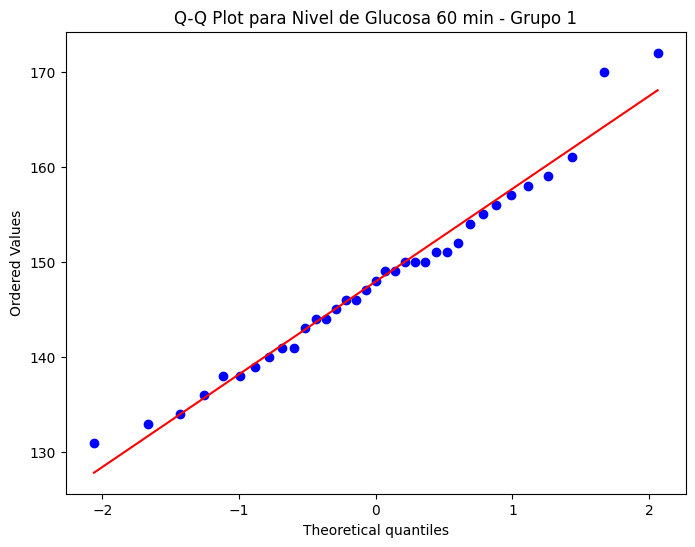

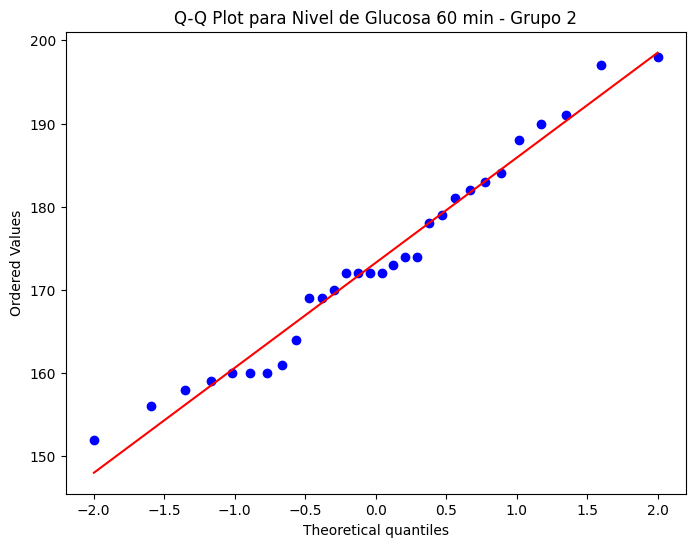

In [ ]:
import scipy.stats as stats

datos_glucosa_grupo1 = df_1['Nivel glucosa 60 min']
datos_glucosa_grupo2 = df_2['Nivel glucosa 60 min']

# Crear el Q-Q plot para el Grupo 1
plt.figure(figsize=(8, 6))
stats.probplot(datos_glucosa_grupo1, dist="norm", plot=plt)

# Añadir título
plt.title('Q-Q Plot para Nivel de Glucosa 60 min - Grupo 1')

# Mostrar el gráfico
plt.show()

# Crear el Q-Q plot para el Grupo 2
plt.figure(figsize=(8, 6))
stats.probplot(datos_glucosa_grupo2, dist="norm", plot=plt)

# Añadir título
plt.title('Q-Q Plot para Nivel de Glucosa 60 min - Grupo 2')

# Mostrar el gráfico
plt.show()

## Alternativa: Prueba de normalidad con Shapiro-Wilk

In [ ]:

stat, p = sc.shapiro(datos_glucosa_grupo1)
print('Estadístico=%.3f, p-valor=%.3f' % (stat, p))

# Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('Los datos parecen ser normales (no se rechaza H0)')
else:
    print('Los datos no parecen ser normales (se rechaza H0)')

Estadístico=0.974, p-valor=0.549
Los datos parecen ser normales (no se rechaza H0)


In [ ]:
stat, p = sc.shapiro(datos_glucosa_grupo2)
print('Estadístico=%.3f, p-valor=%.3f' % (stat, p))

# Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('Los datos parecen ser normales (no se rechaza H0)')
else:
    print('Los datos no parecen ser normales (se rechaza H0)')

Estadístico=0.966, p-valor=0.436
Los datos parecen ser normales (no se rechaza H0)


## Conclusión:
* Segun la prueba de normalidad de Shapiro-Wilk y el grafico Q-Q PLot los datos siguen una distribución normal




# Ejercicio 2
Con los datos del fichero anterior, se quiere estudiar la relación
existente entre el nivel basal y el nivel de glucosa que tienen los
pacientes sanos jóvenes( grupo 1) una hora después de tomar el
preparado de glucosa. Se pide:

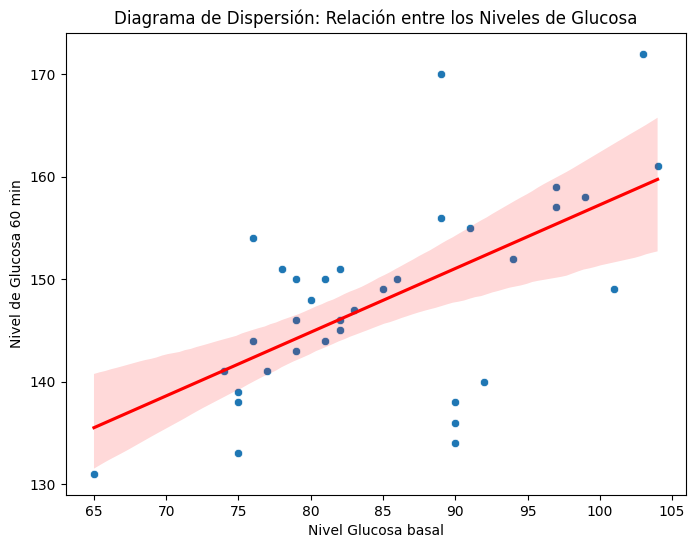

In [ ]:

datos_glucosa_basal = df_1['Nivel glucosa basal']
datos_glucosa_60min = df_1['Nivel glucosa 60 min']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=datos_glucosa_basal, y=datos_glucosa_60min)

# Añadir línea de tendencia
sns.regplot(x=datos_glucosa_basal, y=datos_glucosa_60min, scatter=False, color="red")

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión: Relación entre los Niveles de Glucosa')
plt.xlabel('Nivel Glucosa basal')
plt.ylabel('Nivel de Glucosa 60 min')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el coeficiente de correlación de Pearson
coef_corr, p_valor = sc.pearsonr(datos_glucosa_basal, datos_glucosa_60min)
print(f'Coeficiente de correlación de Pearson: {coef_corr:.3f}')
print(f'P-valor: {p_valor:.8f}')

# Interpretación del p-valor
if p_valor < 0.05:
    print('Existe una correlación significativa entre las variables.')
else:
    print('No existe una correlación significativa entre las variables.')

Coeficiente de correlación de Pearson: 0.611
P-valor: 0.00009827
Existe una correlación significativa entre las variables.


## Conclusión:
* El coeficiente de correlacion es esta alejado de '0' por lo que existe relacion entre el nivel de glucosa basal inicial y el nivel de glucosa despues de 60 min


## b) Obtener un modelo lineal que explica el nivel de glucosa en sangre a los 60 minutos en función del nivel basal del paciente y realizar la estimación para un paciente cuyo nivel basal es 83 mg/Dl

Modelo lineal: y = 0.622 * x + 95.093
Predicción para nivel basal de 83 mg/dL: 146.68 mg/dL


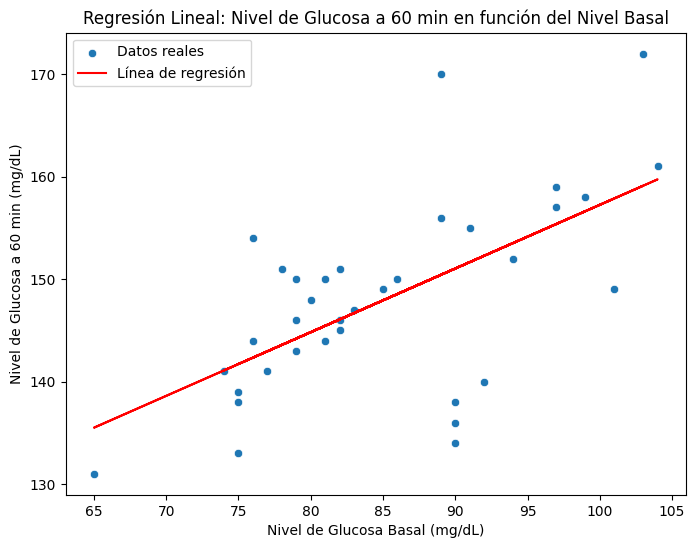

In [ ]:
from sklearn.linear_model import LinearRegression

x = df_1['Nivel glucosa basal'].values.reshape(-1, 1) # Nivel basal como variable independiente
y = df_1['Nivel glucosa 60 min'].values

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(x, y)

pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'Modelo lineal: y = {pendiente:.3f} * x + {intercepto:.3f}')


# Predecir el nivel de glucosa a los 60 minutos para un paciente con nivel basal de 83 mg/dL
nivel_basal_nuevo = np.array([[83]])  # El valor basal es 83 mg/dL
prediccion = modelo.predict(nivel_basal_nuevo)
print(f'Predicción para nivel basal de 83 mg/dL: {prediccion[0]:.2f} mg/dL')

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.flatten(), y=y, label="Datos reales")
plt.plot(x, modelo.predict(x), color='red', label='Línea de regresión')

# Añadir etiquetas y título
plt.title('Regresión Lineal: Nivel de Glucosa a 60 min en función del Nivel Basal')
plt.xlabel('Nivel de Glucosa Basal (mg/dL)')
plt.ylabel('Nivel de Glucosa a 60 min (mg/dL)')
plt.legend()
plt.show()

## c) ¿Qué tanto por ciento del nivel de glucosa en sangre pasados 60minutos queda no queda explicado por el anterior modelo?

In [ ]:
r_squared = modelo.score(x, y)

# Calcular el porcentaje no explicado
porcentaje_no_explicado = (1 - r_squared) * 100

print(f"El R^2 del modelo es: {r_squared:.3f}")
print(f"El porcentaje del nivel de glucosa a 60 minutos no explicado por el modelo es: {porcentaje_no_explicado:.2f}%")

El R^2 del modelo es: 0.373
El porcentaje del nivel de glucosa a 60 minutos no explicado por el modelo es: 62.72%


## d) Si aumentásemos el nivel basal de un paciente en 5 mg/Dl ¿Qué variación experimentaría su nivel de glucosa al cabo de 60 minutos?

In [ ]:
# Calcular la variación en el nivel de glucosa a los 60 minutos
aumento_basal = 5  # mg/dL
variacion_glucosa = pendiente * aumento_basal

print(f'La variación en el nivel de glucosa a 60 minutos al aumentar 5 mg/dL en el nivel basal es: {variacion_glucosa:.2f} mg/dL')

La variación en el nivel de glucosa a 60 minutos al aumentar 5 mg/dL en el nivel basal es: 3.11 mg/dL


# Ejercicio 3

## a) Se quiere estudiar si se puede admitir que el nivel medio de glucosa en sangre en el momento de la ingestión en los jóvenes es 88 mg/Dl. Obtener el intervalo de confianza al 95% y al 99% para el nivel medio de glucosa en sangre de los jóvenes y posteriormente contesta a la cuestión planteada con los resultados obtenidos o con un contraste de hipótesis.

In [ ]:

datos_glucosa = df_1['Nivel glucosa basal']  # Nivel de glucosa basal

# Calcular la media, desviación estándar y tamaño de la muestra
media_muestral = np.mean(datos_glucosa)
desviacion_estandar = np.std(datos_glucosa, ddof=1)
n = len(datos_glucosa)

# Valores críticos para el intervalo de confianza al 95% y 99%
z_95 = stats.norm.ppf(0.975)  # 95%
z_99 = stats.norm.ppf(0.995)  # 99%

# Intervalo de confianza al 95%
ic_95_inf = media_muestral - z_95 * (desviacion_estandar / np.sqrt(n))
ic_95_sup = media_muestral + z_95 * (desviacion_estandar / np.sqrt(n))

# Intervalo de confianza al 99%
ic_99_inf = media_muestral - z_99 * (desviacion_estandar / np.sqrt(n))
ic_99_sup = media_muestral + z_99 * (desviacion_estandar / np.sqrt(n))

print(f"Intervalo de confianza al 95%: ({ic_95_inf:.2f}, {ic_95_sup:.2f}) mg/dL")
print(f"Intervalo de confianza al 99%: ({ic_99_inf:.2f}, {ic_99_sup:.2f}) mg/dL")

# Realizar el contraste de hipótesis (t-test de una muestra)
nivel_referencia = 88  # Nivel medio teórico

t_stat, p_valor = stats.ttest_1samp(datos_glucosa, nivel_referencia)

print(f"T-stat: {t_stat:.3f}, P-valor: {p_valor:.3f}")



Intervalo de confianza al 95%: (81.92, 88.14) mg/dL
Intervalo de confianza al 99%: (80.94, 89.11) mg/dL
T-stat: -1.874, P-valor: 0.070


## Conclusión:
* Como no conocemos la desviación estándar de la población, usaremos un test t de Student para contrastar si la media muestral difiere significativamente de 88 mg/dL.
* Se acepta la Hipotesis Nula H0 al 95% de confianza
* Se acepta la Hipotesis Nula H0 al 99% de confianza

## b) Obtener los intervalos de confianza al 95% para la diferencia de medias en el nivel basal de glucosa entre adultos y jovenes e interpreta los resultados. ¿Se puede concluir que el nivel basal de glucosa de los jóvenes y los adultos es el mismo con nivel de significación del 5%? .Suponiendo que se cumplen las condiciones iniciales teóricas para obtener los intervalos de confianza

In [ ]:


# Datos de glucosa basal para jóvenes y adultos
glucosa_jovenes = df_1['Nivel glucosa basal']
glucosa_adultos = df_2['Nivel glucosa basal']

# Calcular medias, desviaciones estándar y tamaños de muestra
media_jovenes = np.mean(glucosa_jovenes)
media_adultos = np.mean(glucosa_adultos)

std_jovenes = np.std(glucosa_jovenes, ddof=1)
std_adultos = np.std(glucosa_adultos, ddof=1)

n_jovenes = len(glucosa_jovenes)
n_adultos = len(glucosa_adultos)

# Diferencia de medias
diferencia_medias = media_jovenes - media_adultos

# Error estándar de la diferencia de medias
error_estandar = np.sqrt((std_jovenes**2 / n_jovenes) + (std_adultos**2 / n_adultos))

# Valor crítico Z para un intervalo de confianza al 95% (bilateral)
z_95 = stats.norm.ppf(0.975)

# Intervalo de confianza al 95%
ic_95_inf = diferencia_medias - z_95 * error_estandar
ic_95_sup = diferencia_medias + z_95 * error_estandar

print(f"Intervalo de confianza al 95% para la diferencia de medias: ({ic_95_inf:.2f}, {ic_95_sup:.2f}) mg/dL")

# Contraste de hipótesis para la diferencia de medias (t-test para dos muestras independientes)
t_stat, p_valor = stats.ttest_ind(glucosa_jovenes, glucosa_adultos)

print(f"T-stat: {t_stat:.3f}, P-valor: {p_valor:.3f}")

# Nivel de significancia
alpha = 0.05

# Decisión basada en el p-valor
if p_valor < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Intervalo de confianza al 95% para la diferencia de medias: (-10.14, -1.47) mg/dL
T-stat: -2.601, P-valor: 0.012
Rechazamos la hipótesis nula


## Conclusion:
* Rechazamos H0 ya que el p-valor es menor que 0,05, esto quiere decir que hay diferencia entre los niveles basales de glucosa entre jovenes y adultos

## c) Se quiere estudiar la proporción de la población con un nivel basal de glucosa superior a 95 mg/Dl (prediabetes). A partir de la muestra del fichero (tomando todos los datos) obtener un intervalo de confianza al 98% y contrastar la hipótesis que la proporción de la población con glucosa superior a 95 mg/Dl es 0,15 con nivel de significación del 5%.

In [ ]:
# Datos de glucosa basal para toda la población
glucosa_poblacion = df['Nivel glucosa basal']  # Unimos los datos de jóvenes y adultos

# Calcular la proporción muestral (glucosa > 95 mg/dL)
glucosa_prediabetes = glucosa_poblacion[glucosa_poblacion > 95]
n_total = len(glucosa_poblacion)  # Tamaño total de la muestra
p_muestral = len(glucosa_prediabetes) / n_total  # Proporción muestral

# Nivel de confianza del 98%
z_98 = stats.norm.ppf(0.99)

# Error estándar de la proporción
error_estandar = np.sqrt(p_muestral * (1 - p_muestral) / n_total)

# Intervalo de confianza al 98%
ic_98_inf = p_muestral - z_98 * error_estandar
ic_98_sup = p_muestral + z_98 * error_estandar

print(f"Intervalo de confianza al 98% para la proporción: ({ic_98_inf:.3f}, {ic_98_sup:.3f})")

# Contraste de hipótesis para la proporción (población con glucosa > 95 mg/dL)
p_0 = 0.15  # Proporción teórica
z_stat = (p_muestral - p_0) / np.sqrt(p_0 * (1 - p_0) / n_total)

# Calcular el p-valor asociado al estadístico
p_valor = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))  # Bilateral

print(f"P-valor: {p_valor:.3f}")

# Nivel de significancia
alpha = 0.05

# Decisión basada en el p-valor
if p_valor < alpha:
    print(f"Rechazamos la hipótesis nula.")
else:
    print(f"No rechazamos la hipótesis nula")

Intervalo de confianza al 98% para la proporción: (0.135, 0.388)
P-valor: 0.012
Rechazamos la hipótesis nula.


## Conclusion:
* Se rechaza H0 ya que la proporrcion de la población con glucosa superior a 95 mg/dL es significativamente diferente de 0.15.